Week 1: Intro to tech

In [49]:
import numpy as np
import uproot
import vector
import awkward
import matplotlib.pyplot as plt

In [110]:
events = uproot.open('/Users/archiebrooks/Documents/Uni/mphys project/MPHYS-4Top//4tops_partonic_skimmed_2409.root')
print(events['tree'].keys())
tree = events['tree']

for data in tree.iterate(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e']):

    pt_mask_1 = data['top_pt'][:, 0] > 50
    pt_mask_2 = data['top_pt'][:, 1] > 50

    eta_mask_1 = (data['top_eta'][:, 0] > -2.4) & (data['top_eta'][:, 0] < 2.4)
    eta_mask_2 = (data['top_eta'][:, 1] > -2.4) & (data['top_eta'][:, 1] < 2.4)

    anti_pt_mask_1 = data['anti_top_pt'][:, 0] > 50
    anti_pt_mask_2 = data['anti_top_pt'][:, 1] > 50

    anti_eta_mask_1 = (data['anti_top_eta'][:, 0] > -2.4) & (data['anti_top_eta'][:, 0] < 2.4)
    anti_eta_mask_2 = (data['anti_top_eta'][:, 1] > -2.4) & (data['anti_top_eta'][:, 1] < 2.4)

    masks = pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2 & anti_pt_mask_1 & anti_pt_mask_2 & anti_eta_mask_1 & anti_eta_mask_2

    top_pt = awkward.to_numpy(data['top_pt'])
    top_e = awkward.to_numpy(data['top_e'])
    top_eta = awkward.to_numpy(data['top_eta'])
    antitop_eta = awkward.to_numpy(data['anti_top_eta'])


    filtered_top_pt = top_pt[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_e = top_e[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_eta = top_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_antitop_eta = antitop_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]

['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e']


In [120]:
tops = vector.zip({'pt':tree['top_pt'],'eta':tree['top_eta'],'phi':tree['top_phi'], 'mass':172.76})
print(tops)

[]


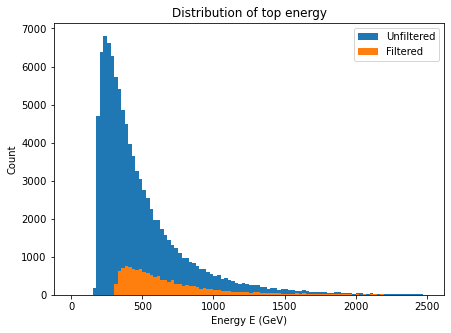

In [103]:
split_top_e = top_e.reshape(100000,1)
split_filtered_top_e = filtered_top_e.reshape(13634,1)

plt.figure(figsize=(7,5))
plt.hist(split_top_e, bins=100, label = 'Unfiltered', range=(0,2500))
plt.hist(split_filtered_top_e, bins=100, label = 'Filtered', range=(0,2500))
plt.title("Distribution of top energy")
plt.xlabel(r"Energy E (GeV)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [79]:
split_antitop_eta = antitop_eta.reshape(100000,1)
split_filtered_antitop_eta = filtered_antitop_eta.reshape(13634,1)
split_top_eta = top_eta.reshape(100000,1)
split_filtered_top_eta = filtered_top_eta.reshape(13634,1)

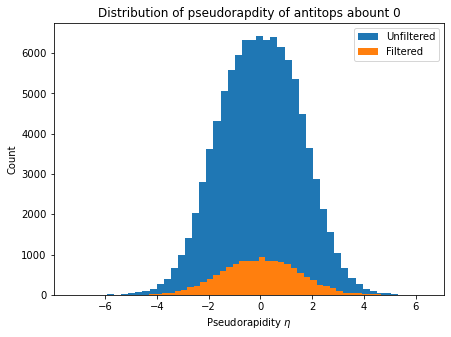

In [94]:
plt.figure(figsize=(7,5))
plt.hist(split_antitop_eta, bins=50, label = 'Unfiltered')
plt.hist(split_filtered_antitop_eta, bins=50, label = 'Filtered')
plt.title("Distribution of pseudorapdity of antitops abount 0")
plt.xlabel(r"Pseudorapidity $\eta$")
plt.ylabel("Count")
plt.legend()
plt.show()

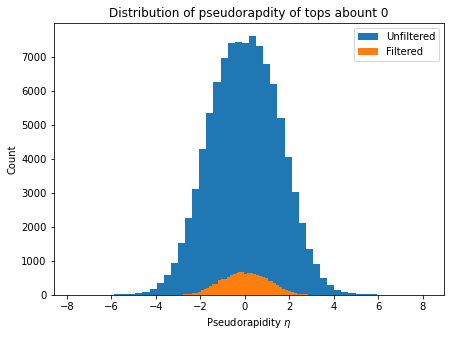

In [95]:
plt.figure(figsize=(7,5))
plt.hist(split_top_eta, bins=50, label = 'Unfiltered')
plt.hist(split_filtered_top_eta, bins=50, label = 'Filtered')
plt.title("Distribution of pseudorapdity of tops abount 0")
plt.xlabel(r"Pseudorapidity $\eta$")
plt.ylabel("Count")
plt.legend()
plt.show()